# Linear Time Invarient Systems

## 3.1 Continuous-Time Systems: Convolution Integral


## 3.1.1 Implementing Convolution Using Numerical Integration

In [1]:
from scipy import integrate, signal
import numpy as np
import matplotlib.pyplot as plt


In [2]:
h = lambda t: (t > 0)*1.0
x = lambda t: (t > 0) * np.exp(-2*t) # a = −2
Fs = 50 # Sampling frequency for the plotting
T = 5 # Time range
t = np.arange(-T, T, 1/Fs) # Time samples

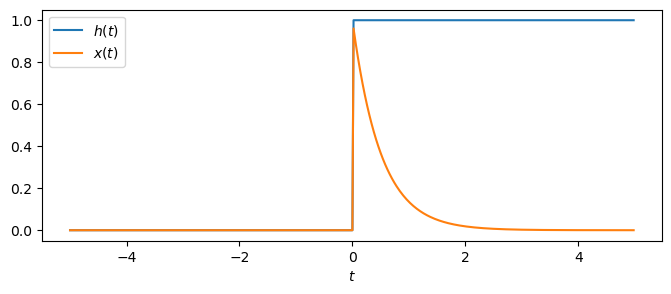

In [3]:
plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()

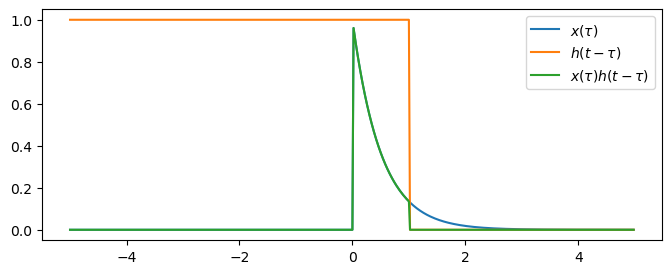

In [4]:
# Plotting
t_ = 1 # For illustration, choose some value for t
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau)*h(t_ - tau)

plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
plt.legend()

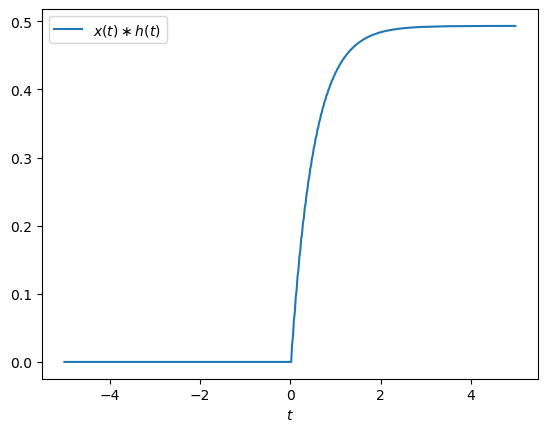

In [5]:
# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simps(product(t), t) # Actual convolution at time t

plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

### Task 1
sketch above and comment

## 3.1.2 Convolving with a Signal Composed of Impulse Functions

In [6]:
# simple approx. of impulse function
fs = 1000 # Sampling frequency for the plotting
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])

### Task 2 
use simpsons rule integration to obtain interal of impulse (delta) function.

In [7]:
T=3
t1 = np.arange(-T,T,1/fs)
integ_delta = integrate.simps(delta(t1),t1)
integ_delta

0.9999999999998899

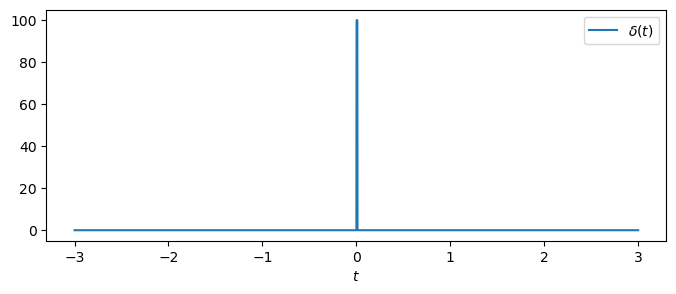

In [8]:
plt.figure(figsize=(8,3))
plt.plot(t1, delta(t1), label=r'$\delta (t)$')
plt.xlabel(r'$t$')
plt.legend()

### Task 3


### Task 4

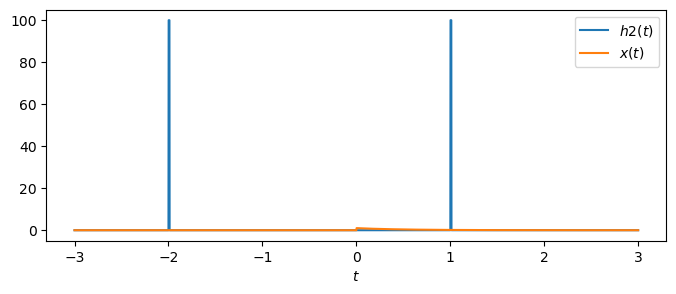

In [9]:
h2 = lambda t2: delta(t2+2)+delta(t2-1)

plt.figure(figsize=(8,3))
plt.plot(t1, h2(t1), label='$h2(t)$')
plt.plot(t1, x(t1), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()

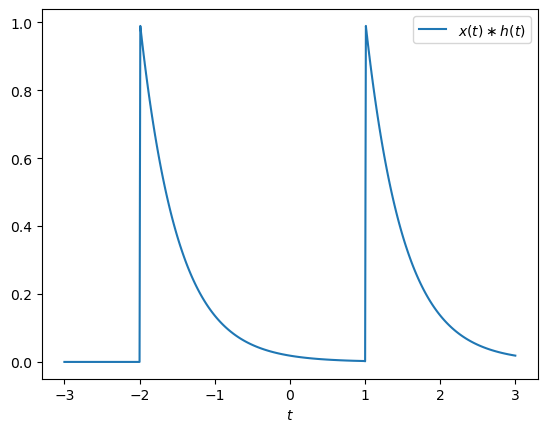

In [10]:
# Computing the convolution using integration
y2 = np.zeros(len(t1))
for n, t_ in enumerate(t1):
    product2 = lambda tau: x(tau) * h2(t_ - tau)
    y2[n] = integrate.simps(product2(t1), t1) # Actual convolution at time t

plt.plot(t1, y2, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

## 3.2 Discrete-Time Systems: Convolution Sum

In [11]:
x = np.array([0, 1, 1, 2, 0])
h = np.array([0, 0, 0, 3, 1, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n -1)
    hkmax = min(len(h), len(x) + len(h) -n -1)
    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


### Task 5
sketch the output

Text(0, 0.5, '$y$')

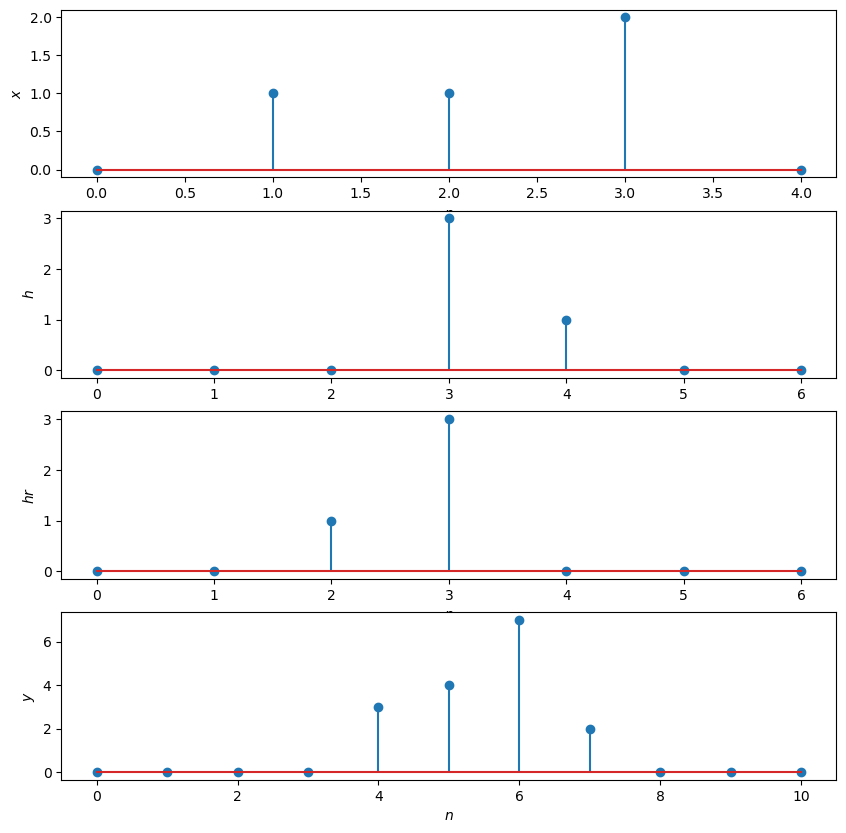

In [12]:
fig, axes = plt.subplots(4,1,figsize=(10,10))
axes[0].stem(x)
axes[0].set_xlabel('$n$')
axes[0].set_ylabel('$x$')

axes[1].stem(h)
axes[1].set_xlabel('$n$')
axes[1].set_ylabel('$h$')

axes[2].stem(hr)
axes[2].set_xlabel('$n$')
axes[2].set_ylabel('$hr$')

axes[3].stem(y)
axes[3].set_xlabel('$n$')
axes[3].set_ylabel('$y$')

### Task 6

In [13]:
x = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])
h = np.array([0, 0, 0, 0, 1, 2, 0, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
    if n in range(-4+len(y)//2,len(y)//2+1+4):
        xkmin = max(0, n - len(h) + 1)
        xkmax = min(len(x), n + 1)
        hkmin = max(0, len(h) - n -1)
        hkmax = min(len(h), len(x) + len(h) -n -1)
        y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
        print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

y[4] = x[0:5]*h[4:9] = 0.0
y[5] = x[0:6]*h[3:9] = 0.0
y[6] = x[0:7]*h[2:9] = 0.0
y[7] = x[0:8]*h[1:9] = 1.0
y[8] = x[0:9]*h[0:9] = 3.0
y[9] = x[1:9]*h[0:8] = 4.0
y[10] = x[2:9]*h[0:7] = 4.0
y[11] = x[3:9]*h[0:6] = 0.0
y[12] = x[4:9]*h[0:5] = 0.0


### Task 7

In [14]:
y3 = signal.convolve(x,h)
y3

array([0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 4, 0, 0, 0, 0, 0, 0])

In [15]:
signal.convolve(x,h,mode="full")

array([0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 4, 0, 0, 0, 0, 0, 0])

In [16]:
signal.convolve(x,h,mode="valid")

array([3])

In [17]:
signal.convolve(x,h,mode="same")

array([0, 0, 0, 1, 3, 4, 4, 0, 0])

comment of above methods <br>
x size = n <br>
h size = k

* <b>Full mode</b>: gives output in size (n+k-1), by padding the input on both left and right by k-1 samples when convolving.
* <b>Valid mode</b>: eliminates outputs that depends on padding
* <b>Same mode</b>: this is derived from full mode by extracting n samples from the full convolution.


## 3.3 An Application in Audio Signal Filtering

In [18]:
import soundfile as sf

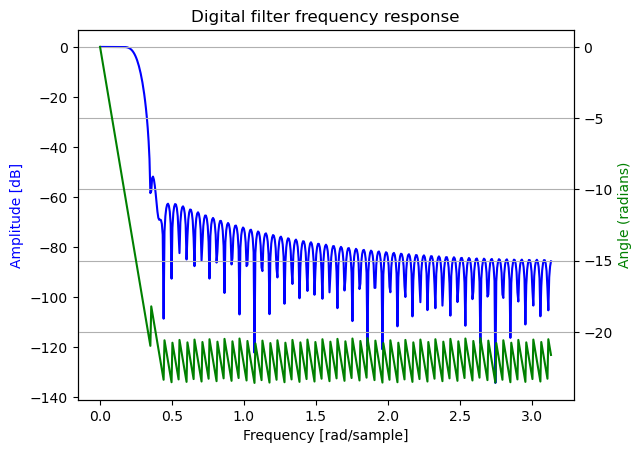

In [19]:
data, samplerate = sf.read('poweroflove.wav')

nyquist = samplerate//2
fc = 2000/nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

In [20]:
# convolution code
# signal.convolve(h, delta)

In [21]:
# sf.write('audio_file_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)

## 3.4 Convolution Sum in 2-D


In [22]:
x = [[0,0,0,0,0],
     [0,0,0,0,0],
     [0,0,1,0,0],
     [0,0,0,0,0],
     [0,0,0,0,0]]
h = [[1,2,3],
     [4,5,6],
     [7,8,9]]
xhconv = signal.convolve2d(x,h)
xhconv

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 7, 8, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

#### Interpretation
The resulting array is of size kxk = (n+m-1)x(n+m-1) where x is size nxn and h is size mxm.
then h is flipped and shifts cell by cell from 1,1 to every cell and sum up all the corresponding cell products and save it in y's cell.

## 3.5 Application: Using Convolution to Filter an Image

In [23]:
import matplotlib.image as mpimg
import pandas as pd

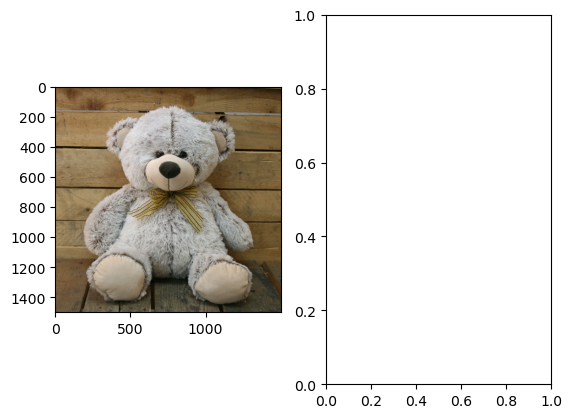

In [24]:
x_3d = mpimg.imread('teddy.jpg')
fig, ax = plt.subplots(1,2)
ax[0].imshow(x_3d, cmap='gray')

In [25]:
# plt.imshow(x)
# x
x_3d.shape

(1500, 1500, 3)

converting 3d rgb valued img to 2d values and show in grayscale

In [26]:
x_2d = np.zeros((1500,1500))
for i in range(1500):
    for j in range(1500):
        x_2d[i][j]=np.average(x_3d[i][j])
x_2d

array([[ 79.33333333,  80.33333333,  81.33333333, ..., 109.33333333,
        107.33333333, 106.66666667],
       [ 84.33333333,  82.33333333,  77.33333333, ..., 108.33333333,
        107.33333333, 106.66666667],
       [ 87.33333333,  83.33333333,  77.33333333, ..., 114.66666667,
        113.66666667, 114.        ],
       ...,
       [ 82.        ,  82.        ,  82.        , ...,  62.33333333,
         59.33333333,  58.66666667],
       [ 79.        ,  80.        ,  80.        , ...,  67.33333333,
         62.33333333,  58.66666667],
       [ 77.        ,  77.        ,  77.        , ...,  68.66666667,
         63.33333333,  58.66666667]])

In [27]:
# h_vertical = [[[-1,-1,-1],[0,0,0],[1,1,1]],
#               [[-2,-2,-2],[0,0,0],[2,2,2]],
#               [[-1,-1,-1],[0,0,0],[1,1,1]]]

# kernal

h_vertical = [[-1,0,1],
              [-2,0,2],
              [-1,0,1]]

In [28]:
y_vertical = signal.convolve2d(x_2d,h_vertical)

Text(0.5, 1.0, 'grayscale original image and convolution with the kernal')

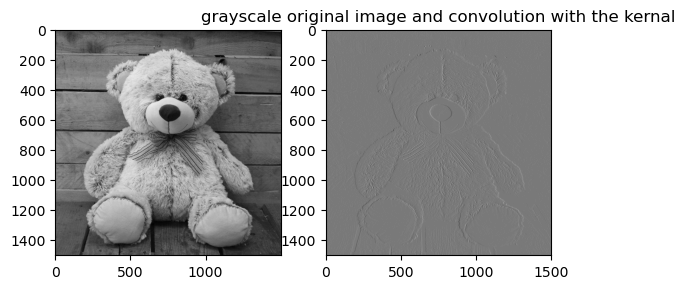

In [29]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(x_2d, cmap='gray')
ax[1].imshow(y_vertical, cmap='gray')
plt.title('grayscale original image and convolution with the kernal')

In [30]:
h_horizontal = np.transpose(h_vertical)
h_horizontal

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [31]:
y_horizontal = signal.convolve2d(x_2d,h_horizontal)

In [32]:
h_diag_1 =  [[0,1,1],
              [-1,0,1],
              [-1,-1,0]]
y_diag_1 = signal.convolve2d(x_2d,h_diag_1)

h_diag_2 =  [[0,-1,-1],
              [1,0,-1],
              [1,1,0]]
y_diag_2 = signal.convolve2d(x_2d,h_diag_2)

h_blur =  [[0.01,0.01,0.01],
           [0.01,0.01,0.01],
           [0.01,0.01,0.01]]
y_blur = signal.convolve2d(x_2d,h_blur)

Text(0.5, 1.0, 'blur')

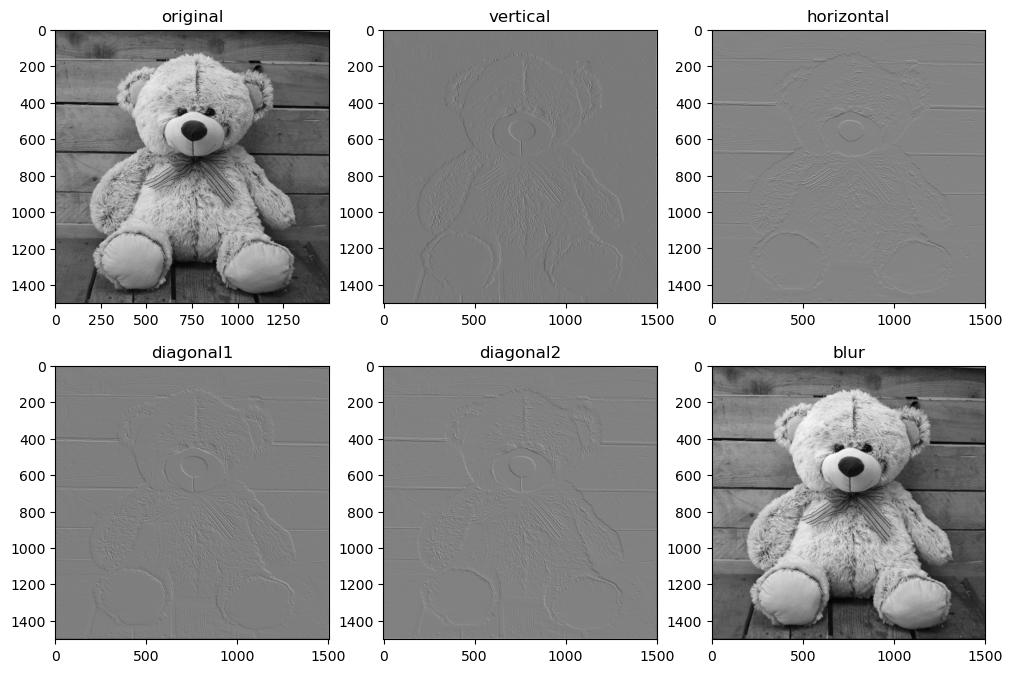

In [36]:
fig,ax = plt.subplots(2,3, figsize=(12,8))
ax[0][0].imshow(x_2d, cmap='gray')
ax[0][0].set_title('original')
ax[0][1].imshow(y_vertical, cmap='gray')
ax[0][1].set_title('vertical')
ax[0][2].imshow(y_horizontal, cmap='gray')
ax[0][2].set_title('horizontal')
ax[1][0].imshow(y_diag_1, cmap='gray')
ax[1][0].set_title('diagonal1')
ax[1][1].imshow(y_diag_2, cmap='gray')
ax[1][1].set_title('diagonal2')
ax[1][2].imshow(y_blur, cmap='gray')
ax[1][2].set_title('blur')



In [37]:
mid=5
edg=-1
h_edge = [[0,edg,0],
        [edg,mid,edg],
        [0,edg,0]]
y_edge = signal.convolve2d(x_2d,h_edge)

h_edge_2 = [[edg,edg,edg],
        [edg,mid,edg],
        [edg,edg,edg]]
y_edge_2 = signal.convolve2d(x_2d,h_edge_2)

Text(0.5, 1.0, 'y_edge_2')

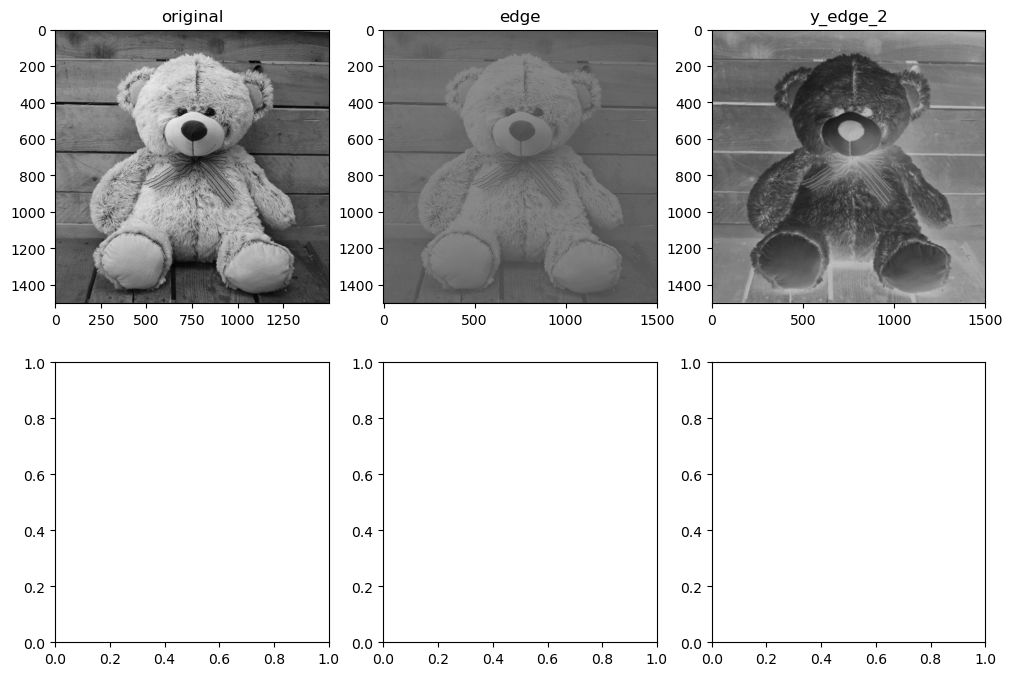

In [38]:
fig,ax = plt.subplots(2,3, figsize=(12,8))
ax[0][0].imshow(x_2d, cmap='gray')
ax[0][0].set_title('original')
ax[0][1].imshow(y_edge, cmap='gray')
ax[0][1].set_title('edge')
ax[0][2].imshow(y_edge_2, cmap='gray')
ax[0][2].set_title('y_edge_2')
# ax[1][0].imshow(y_diag_1, cmap='gray')
# ax[1][0].set_title('diag_1')
# ax[1][1].imshow(y_diag_2, cmap='gray')
# ax[1][1].set_title('diag_2')
# ax[1][2].imshow(y_blur, cmap='gray')
# ax[1][2].set_title('smooth and blur')

### Effects from different kernals

In [42]:
h_vertical = [[-1,0,1],
              [-2,0,2],
              [-1,0,1]]
y_vertical = signal.convolve2d(x_2d,h_vertical)

h_horizontal = np.transpose(h_vertical)
y_horizontal = signal.convolve2d(x_2d,h_horizontal)

h_diag_1 =  [[0,1,1],
              [-1,0,1],
              [-1,-1,0]]
y_diag_1 = signal.convolve2d(x_2d,h_diag_1)

h_diag_2 =  [[0,-1,-1],
              [1,0,-1],
              [1,1,0]]
y_diag_2 = signal.convolve2d(x_2d,h_diag_2)


In [ ]:

h_blur =  [[0.01,0.01,0.01],
           [0.01,0.01,0.01],
           [0.01,0.01,0.01]]
y_blur = signal.convolve2d(x_2d,h_blur)

mid=5
edg=-1
h_edge = [[0,edg,0],
        [edg,mid,edg],
        [0,edg,0]]
y_edge = signal.convolve2d(x_2d,h_edge)

h_edge_2 = [[edg,edg,edg],
        [edg,mid,edg],
        [edg,edg,edg]]
y_edge_2 = signal.convolve2d(x_2d,h_edge_2)

Text(0.5, 1.0, 'edge')

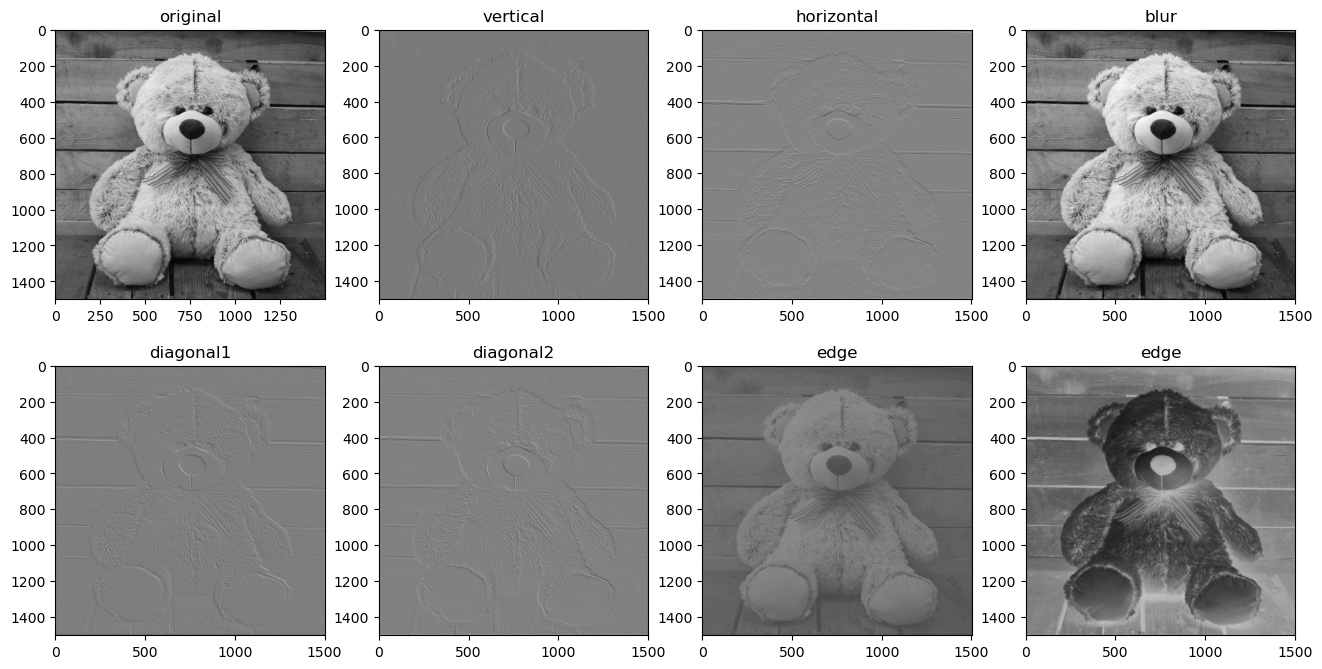

In [43]:
fig,ax = plt.subplots(2,4, figsize=(16,8))
ax[0][0].imshow(x_2d, cmap='gray')
ax[0][0].set_title('original')
ax[0][1].imshow(y_vertical, cmap='gray')
ax[0][1].set_title('vertical')
ax[0][2].imshow(y_horizontal, cmap='gray')
ax[0][2].set_title('horizontal')
ax[0][3].imshow(y_blur, cmap='gray')
ax[0][3].set_title('blur')
ax[1][0].imshow(y_diag_1, cmap='gray')
ax[1][0].set_title('diagonal1')
ax[1][1].imshow(y_diag_2, cmap='gray')
ax[1][1].set_title('diagonal2')
ax[1][2].imshow(y_edge, cmap='gray')
ax[1][2].set_title('edge')
ax[1][3].imshow(y_edge_2, cmap='gray')
ax[1][3].set_title('edge')

From the results, the following can be observed. 
* vertical kernal emphasise edges as if lightened from right to left. So parallel edges are not identified while vertical edges are emphasised. Similarly, horizontal keranal emphasise horizontal edges, diagonals in their y=x direction and y=-x direction. This can be visualized as how the edges is seen if the picture has a thrid dimension of depth and how the shadows appear when light applied in the respective direction. 
* Blur kernal takes all values and reduces intensity and the effectt is increased by increasing the size of the matrix.
* In edge kernals, the 3D effect i.e. depth is given added by the kernal which gives the result like passing a ripple. h_edge looks like a positive ripple and h_edge_2 negative. The first and second looks complementary when we look at it, like the negative colours effect.